<a href="https://colab.research.google.com/github/KubraErensoy/BTK-DATASCIENCE/blob/main/ML_Clustering%26PCA_code6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kümeleme**


*   Kümeleme bir veri setinde benzer özellikler gösteren verilerin gruplara ayrılmasına denir. 

1.    K-Ortalama Kümeleme:N adet veri nesnesinden oluşan bir veri kümesinin giriş parametresi olarak verilen K adet kümeye bölümlemektir.
2.    Hiyerarşik Kümeleme: bir küme hiyerarşisi oluşturmaya çalışan bir küme analizi yöntemidir.
    - Agglomerative Clustering; Parçadan bütüneprensibi ile çalışır. İlk başta tüm verileri birer küme olarak görür. Birbirine mesafe olarak yakın olankümeler birleştirilerek kümeler oluşturulur
    - Divisive Clustering; Bütünden parçaya prensibi ile çalışır. Tüm veriler tek bir küme oluşturur. Ardından küme içinde yakınlığa bağlı yeni kümeleme işlemi yapılır.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
#veri seti oluştur

#küme 1
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)

#küme 2
x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)

#küme 3
x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary={"x":x,"y":y}
data=pd.DataFrame(dictionary)
data.head()



,x,y
0,24.270025,17.722490
1,19.107939,23.756892
2,23.457409,23.379476
3,35.835436,23.078891
4,28.225033,20.411728


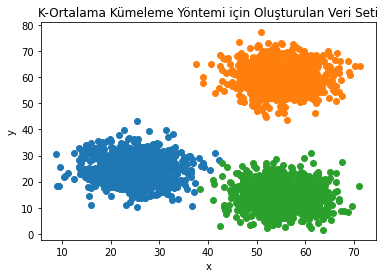

In [ ]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

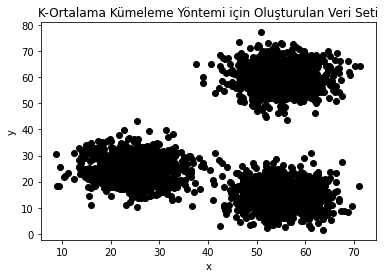

In [ ]:
#k ortalama algoritması veriyi böyle görecek
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Ortalama Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()


**K Değerinin Seçimi**

K değerini seçmek için dirsek yöntemini kullanacağız.

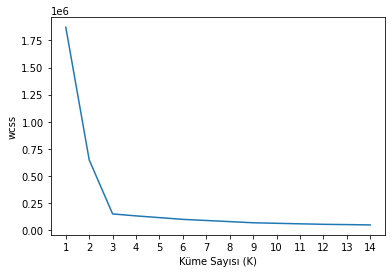

In [ ]:
#k ortalamayı içe aktar
from sklearn.cluster import KMeans
wcss=[]

for k in range (1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Küme Sayısı (K)")
plt.ylabel("wcss")
plt.show()


**K-Ortalama Kümeleme Algoritması Eğitimi ve Testi**
  - K=3 değeri için,3-ortalma kümeleme yönteminin eğitip,testini yapıp sonrasında görselleştireceğiz. 

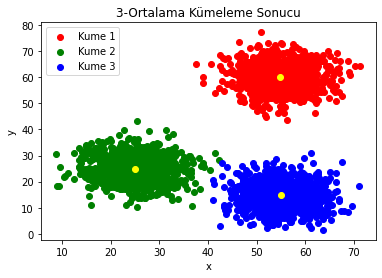

In [ ]:
k_ortalama=KMeans(n_clusters=3)
kumeler=k_ortalama.fit_predict(data)

data["label"]=kumeler

plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red",label="Kume 1")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green",label="Kume 2")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue",label="Kume 3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

**Hiyerarşik Kümeleme(Hierarchical Clustering
)**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#veri seti oluştur

#küme 1
x1=np.random.normal(25,5,20)
y1=np.random.normal(25,5,20)

#küme 2
x2=np.random.normal(55,5,20)
y2=np.random.normal(60,5,20)

#küme 3
x3=np.random.normal(55,5,20)
y3=np.random.normal(15,5,20)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary={"x":x,"y":y}
data=pd.DataFrame(dictionary)
data.head()


,x,y
0,20.992253,25.761005
1,27.300623,27.049611
2,23.404357,24.543685
3,25.942989,29.877476
4,18.988712,20.674430


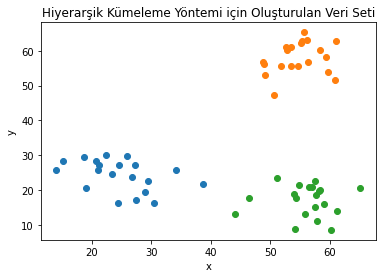

In [ ]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi için Oluşturulan Veri Seti")
plt.show()

**Dendogram Gösterimi**

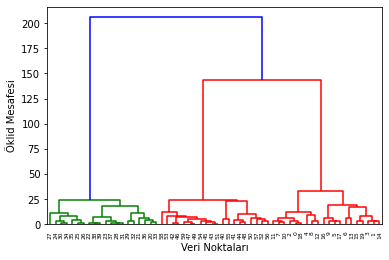

In [ ]:
# %% dendogram
from scipy.cluster.hierarchy import linkage,dendrogram

merg=linkage(data,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()


**Hiyerarşik Kümeleme Algoritması Eğitimi ve Testi**
  - Hiyerarşik Kümeleme yöntemini 3 adet küme oluşturması için eğitip,testini yapıp sonra görselleştireceğiz.

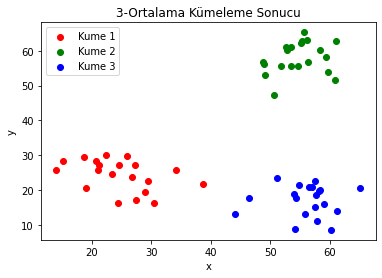

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hiyerarsi_kume=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
kume=hiyerarsi_kume.fit_predict(data)

data["label"]=kume

plt.figure()
plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red",label="Kume 1")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green",label="Kume 2")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue",label="Kume 3")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.show()

**Temel Bileşen Analizi(
Principal Component Analysis)**


*   Karmaşık bir veri kümesinin daha düşük bir boyuta nasıl indirgeneceğine dair bir yol haritası sağlar.


*   PCA algoritması verilerdeki temel özellikleri yakalayarak daha az sayıda değişken ile göstermeye çalışır.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn iris data set

from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y= iris.target

df = pd.DataFrame(data,columns=feature_names)
df["sinif"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Temel Bileşen Analizi Uygulaması**

In [4]:
# %% PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)# Whiten = Normalizasyon
pca.fit(data)

x_pca = pca.transform(data)

print("varience ratio: ",pca.explained_variance_ratio_)

print("sum: ", sum(pca.explained_variance_ratio_))

varience ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


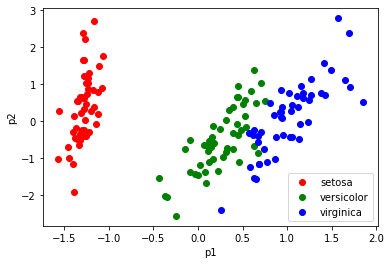

In [5]:
#temel bileşenleri görselleştirelim
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each], color=color[each],label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

**PCA ve Kernel PCA**

In [6]:
#PCA ve kernel PCA karşılaştırma örneği
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000,factor=0.3,noise=0.05,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0)



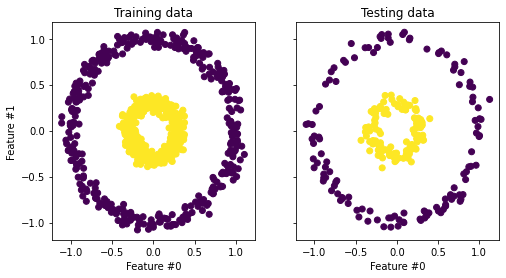

In [7]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [9]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

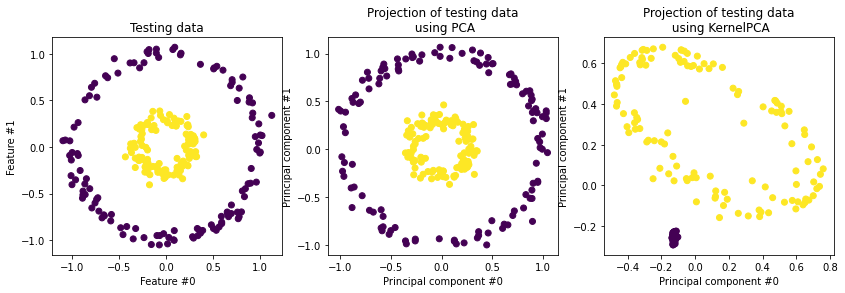

In [13]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [15]:
#reconstruction-geri oluşturma
X_reconstructed_pca=pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca=kernel_pca.inverse_transform(kernel_pca.transform(X_test))

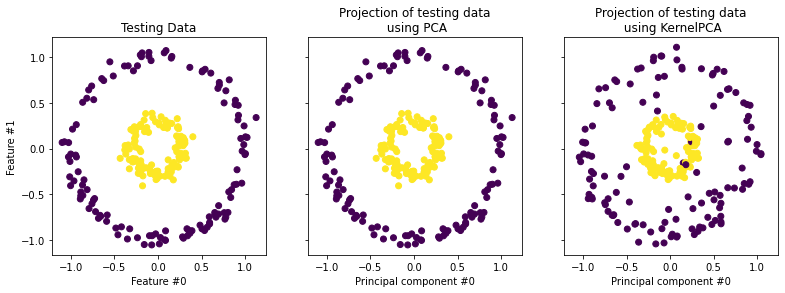

In [17]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, sharex=True,sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing Data")

pca_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")